<a href="https://colab.research.google.com/github/1040mxg/1040mxg.github.io/blob/master/5334hw02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set-up

In [65]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [66]:
#save results/clear results
networkAcc = []
classAcc = []

# Create Network

In [67]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimiser = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


# Training

In [68]:
for epoch in range(2):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimiser.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimiser.step()

        running_loss += loss.item()
        if i % 2000 == 1999: 
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.209
[1,  4000] loss: 1.874
[1,  6000] loss: 1.694
[1,  8000] loss: 1.588
[1, 10000] loss: 1.529
[1, 12000] loss: 1.475
[2,  2000] loss: 1.409
[2,  4000] loss: 1.382
[2,  6000] loss: 1.359
[2,  8000] loss: 1.333
[2, 10000] loss: 1.279
[2, 12000] loss: 1.255
Finished Training


In [69]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

# Testing

In [70]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        percentage = (correct/total)*100

print('Accuracy of the network on the 10000 test images: %d %%' % (
    percentage))

networkAcc.append(percentage)

classTemp = []

class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
  classPerc = 100 * class_correct[i] / class_total[i]
  print('Accuracy of %5s : %2d %%' % (
        classes[i], classPerc))
  classTemp.append(classPerc)

classAcc.append(classTemp)

Accuracy of the network on the 10000 test images: 56 %
Accuracy of plane : 43 %
Accuracy of   car : 72 %
Accuracy of  bird : 34 %
Accuracy of   cat : 36 %
Accuracy of  deer : 48 %
Accuracy of   dog : 51 %
Accuracy of  frog : 78 %
Accuracy of horse : 61 %
Accuracy of  ship : 69 %
Accuracy of truck : 67 %


# Results

[56.330000000000005]


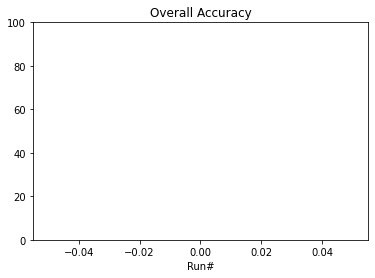

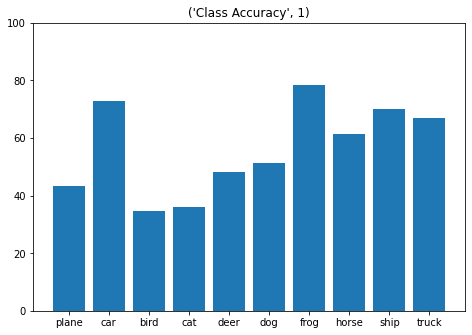

In [71]:
print(networkAcc)
plt.plot(networkAcc)
plt.title("Overall Accuracy")
plt.xlabel("Run#")
plt.ylim([0,100])
plt.show()

classes = ['plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i in range(len(classAcc)):
  fig = plt.figure()
  ax = fig.add_axes([0,0,1,1])
  ax.bar(classes, classAcc[i])
  plt.ylim([0,100])
  tempTitle = "Class Accuracy", i+1
  plt.title(tempTitle)
  plt.show()
